## <center> ANLY590-Homework1 </center>
### <center> Zhengqian Xu</center>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV,RidgeCV
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

**1  
Regularization.**   
Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You must python. https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

**1.1**  

In [39]:
df1 = pd.read_csv('Hitters.csv')

In [40]:
df1.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [42]:
###### drop NA and Categorical columns
df2 = df1.dropna()
df3 = df2.drop(['Unnamed: 0','League','Division','NewLeague'],axis=1)

#### x and y
y =df3['Salary'].values
x = df3.drop('Salary',axis=1)

In [43]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Create a visualization of the coefficient trajectories.Comment on which are the final three predictors that remain in the model.

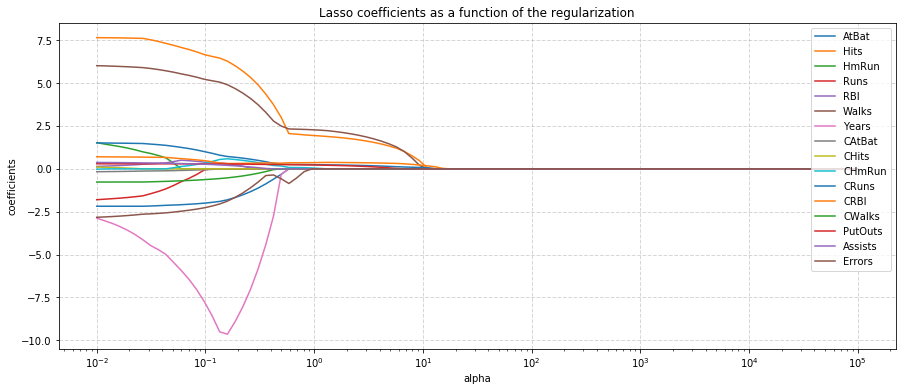

In [44]:
######## lasso: set alpha
alphas = 10**np.linspace(5, -2, 100)

######## coef for different alpha
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a,max_iter=1000,normalize=True)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)


####### 
fig, ax = plt.subplots(figsize=(15,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(x.columns,loc=1)
plt.show()

In [45]:
#### the first time of 3 non-zero coefficients
for i in range(0,len(coefs)):
    a = list(coefs[i])
    if len(a)-a.count(0)==3:
        break

list(zip(x.columns,a))

[('AtBat', 0.0),
 ('Hits', 0.04474348031411178),
 ('HmRun', 0.0),
 ('Runs', 0.0),
 ('RBI', 0.0),
 ('Walks', 0.0),
 ('Years', 0.0),
 ('CAtBat', 0.0),
 ('CHits', 0.0),
 ('CHmRun', 0.0),
 ('CRuns', 0.06324502449783376),
 ('CRBI', 0.17686787862207087),
 ('CWalks', 0.0),
 ('PutOuts', 0.0),
 ('Assists', 0.0),
 ('Errors', 0.0)]

** As we can see, Hits, CRuns, CRBI are three final columns. **

Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [46]:
lassocv = LassoCV(cv=5,max_iter=1000,normalize=True)
lassocv.fit(x,y)
print('optimal value, coefficients:')
list(zip(x.columns,lassocv.coef_))

optimal value, coefficients:


[('AtBat', -1.8950815104470915),
 ('Hits', 6.4555553087147555),
 ('HmRun', -0.0),
 ('Runs', -0.0),
 ('RBI', 0.34980561619803274),
 ('Walks', 5.053509119413589),
 ('Years', -9.587424318953309),
 ('CAtBat', -0.008709924949316565),
 ('CHits', 0.0),
 ('CHmRun', 0.5575238976477267),
 ('CRuns', 0.7890453474485217),
 ('CRBI', 0.3371327459587046),
 ('CWalks', -0.5641359165891351),
 ('PutOuts', 0.2854577506579328),
 ('Assists', 0.2256581531608162),
 ('Errors', -2.039256455199675)]

In [47]:
print('optimal alpha=',lassocv.alpha_)

optimal alpha= 0.13691039485958048


** Optimal alpha for lasso regression is 0.137, and there are 13 predictors in the model.**

**1.2**  

Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.

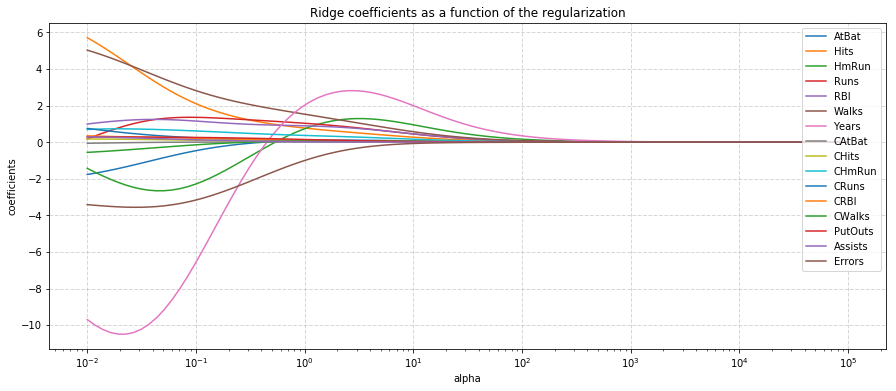

In [48]:
######## lasso: set alpha
alphas = 10**np.linspace(5, -2, 100)

######## coef for different alpha
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a,max_iter=1000,normalize=True)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)


####### 
fig, ax = plt.subplots(figsize=(15,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(x.columns,loc=1)
plt.show()

In [49]:
ridgecv = RidgeCV(cv=5,alphas=alphas,normalize=True)
ridgecv.fit(x,y)
print('optimal value, coefficients:')
list(zip(x.columns,ridgecv.coef_))

optimal value, coefficients:


[('AtBat', 0.07997219412374057),
 ('Hits', 0.833064424218183),
 ('HmRun', 0.5181069753752781),
 ('Runs', 1.072210251967555),
 ('RBI', 0.9090208681271239),
 ('Walks', 1.6200297345118129),
 ('Years', 1.6292669573640213),
 ('CAtBat', 0.011296667516936648),
 ('CHits', 0.055777997340000836),
 ('CHmRun', 0.38700260789776886),
 ('CRuns', 0.11250064418804841),
 ('CRBI', 0.11638929820906385),
 ('CWalks', 0.061272318014844895),
 ('PutOuts', 0.16222988120351167),
 ('Assists', 0.02941557823426811),
 ('Errors', -1.1825857272481362)]

In [50]:
print('optimal alpha=',ridgecv.alpha_)

optimal alpha= 0.8111308307896873


** Optimal alpha is 0.811 for ridge regression.**

** 2 **

Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

** Variance refers to the amount by which the model would change if we use a different training data set; Bias refers to the error of result. As a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. The relative rate of change of these two quantities determines whether the test RMSE increases or decreases. As we increase the flexibility of a model, the bias tends to initially decrease faster than the variance increases. Consequently, the expected test RMSE declines. However, at some point increasing flexibility has little impact on the bias but starts to significantly increase the variance. When this happens the test MSE increases.**

Use the problem1 to illustrate trade-off

In [51]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [52]:
a = 10**np.linspace(-2,2,20)
train=[]
test=[]
for x in a:
    ridge2 = Ridge(alpha = x, normalize = True)
    ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred1 = ridge2.predict(X_train)
    pred2 = ridge2.predict(X_test)          
    # Calculate the train RMSE
    rmse1 = (mean_squared_error(y_train, pred1))**0.5 
    # Calculate the test RMSE
    rmse2 = (mean_squared_error(y_test, pred2))**0.5       # Calculate the test RMSE
    train.append(rmse1)
    test.append(rmse2)

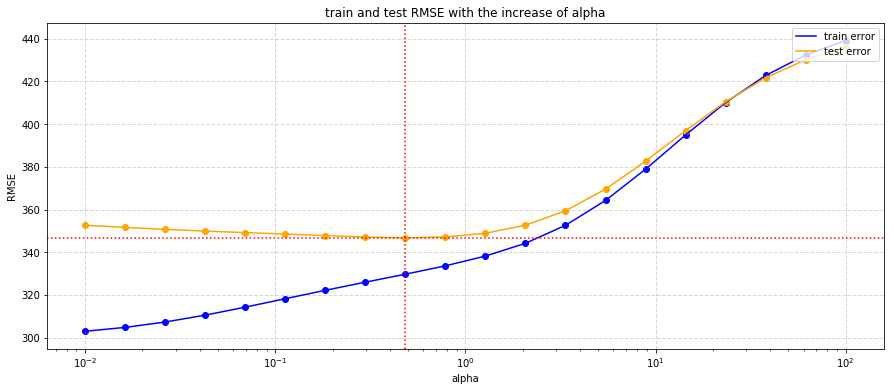

In [53]:
fig, ax = plt.subplots(figsize=(15,6))
ax = plt.gca()
plt.plot(a,train,color='blue')
plt.plot(a,test,color='orange')
plt.scatter(a,train,color='blue')
plt.scatter(a,test,color='orange')
ax.set_xscale('log')
plt.axvline(x=a[test.index(min(test))],color='red',linestyle=':')
plt.axhline(y=min(test),color='red',linestyle=':')
plt.title('train and test RMSE with the increase of alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(['train error','test error'],loc=1)
plt.show()

**The figure above shows the train and test RMSE. Let's focus on test error. When ridge model has small alpha, it has low bias( low RMSE) and high variance ( model in flexible). However, when ridge model has large alpha, it has high bias( high RMSE) and low variance ( model is inflexible). Therefore, these is a tradeoff between bias and variance. When alpha=0.48, test RMSE reaches its minimum. **